In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.metrics import r2_score

plt.style.use("ggplot")


df = pd.read_csv("CONVENIENT_global_deaths.csv")

In [4]:
df.describe()

,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,Austria,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
count,1142.000000,1142.000000,1142.000000,1142.000000,1142.000000,1142.0,1142.000000,1142.000000,1142.000000,1142.000000,...,1142.000000,1142.000000,1142.000000,1142.000000,1142.000000,1142.000000,1142.0,1142.000000,1142.000000,1142.000000
mean,6.914186,3.150613,6.025394,0.144483,1.692644,0.0,0.127846,114.248687,7.641856,19.238179,...,6.669877,1.433450,0.012259,5.126095,37.816112,4.998249,0.0,1.890543,3.552539,4.965849
std,15.642915,4.468616,7.458343,0.532189,3.047264,0.0,0.710097,181.903181,10.783200,26.163800,...,14.480140,2.093863,0.177203,6.748119,89.141889,10.990315,0.0,4.386790,9.581348,12.640019
min,0.000000,0.000000,0.000000,-2.000000,-3.000000,0.0,0.000000,0.000000,-2.000000,-81.000000,...,0.000000,0.000000,0.000000,-6.000000,-3.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,1.000000,1.000000,4.000000,0.000000,0.000000,0.0,0.000000,35.000000,3.000000,10.000000,...,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,6.000000,5.000000,9.000000,0.000000,2.000000,0.0,0.000000,165.000000,11.000000,27.000000,...,5.000000,3.000000,0.000000,7.750000,3.750000,7.000000,0.0,2.000000,2.000000,3.000000
max,159.000000,21.000000,49.000000,7.000000,30.000000,0.0,12.000000,3351.000000,70.000000,145.000000,...,88.000000,9.000000,5.000000,35.000000,804.000000,268.000000,0.0,60.000000,72.000000,107.000000


In [5]:
df.head()

,Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
0,Province/State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1/24/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1/25/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1/26/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
#preproccess step 1 -> convert date to a better formation
df.index = pd.to_datetime(df.index)
print("\nDataFrame with DatetimeIndex:")
print(df)
print("New index type:", type(df.index))


DataFrame with DatetimeIndex:
                               Country/Region  Afghanistan  Albania  Algeria  \
1970-01-01 00:00:00.000000000  Province/State          NaN      NaN      NaN   
1970-01-01 00:00:00.000000001         1/23/20          0.0      0.0      0.0   
1970-01-01 00:00:00.000000002         1/24/20          0.0      0.0      0.0   
1970-01-01 00:00:00.000000003         1/25/20          0.0      0.0      0.0   
1970-01-01 00:00:00.000000004         1/26/20          0.0      0.0      0.0   
...                                       ...          ...      ...      ...   
1970-01-01 00:00:00.000001138          3/5/23          0.0      0.0      0.0   
1970-01-01 00:00:00.000001139          3/6/23          0.0      0.0      0.0   
1970-01-01 00:00:00.000001140          3/7/23          0.0      0.0      0.0   
1970-01-01 00:00:00.000001141          3/8/23          0.0      0.0      0.0   
1970-01-01 00:00:00.000001142          3/9/23          0.0      0.0      0.0   

        

In [7]:
nan_counts_per_column = df.isna().sum()
print("NaN counts per column:\n", nan_counts_per_column)

NaN counts per column:
 Country/Region          0
Afghanistan             1
Albania                 1
Algeria                 1
Andorra                 1
                       ..
West Bank and Gaza      1
Winter Olympics 2022    1
Yemen                   1
Zambia                  1
Zimbabwe                1
Length: 290, dtype: int64


In [8]:
# I searched most death in a day and I thought if anything more than 4466 is not true 
df_cleaned = df.copy()

# 1. Identify which columns are truly numeric (excluding Country/Region)
numeric_cols = df_cleaned.columns[1:][df_cleaned.iloc[:, 1:].apply(pd.api.types.is_numeric_dtype)]

# 2. Only apply the replacement to confirmed numeric columns
df_cleaned[numeric_cols] = df_cleaned[numeric_cols].where(df_cleaned[numeric_cols] >= 0, np.nan)

# 3. Drop rows with any NaN values 
df_cleaned = df_cleaned.dropna()



In [9]:
iran = df_cleaned[['Iran']].copy()
iran = iran.reset_index()
iran.columns = ['ds', 'y']  # Prophet expects columns: ds (date), y (value)

02:21:26 - cmdstanpy - INFO - Chain [1] start processing
02:21:26 - cmdstanpy - INFO - Chain [1] done processing


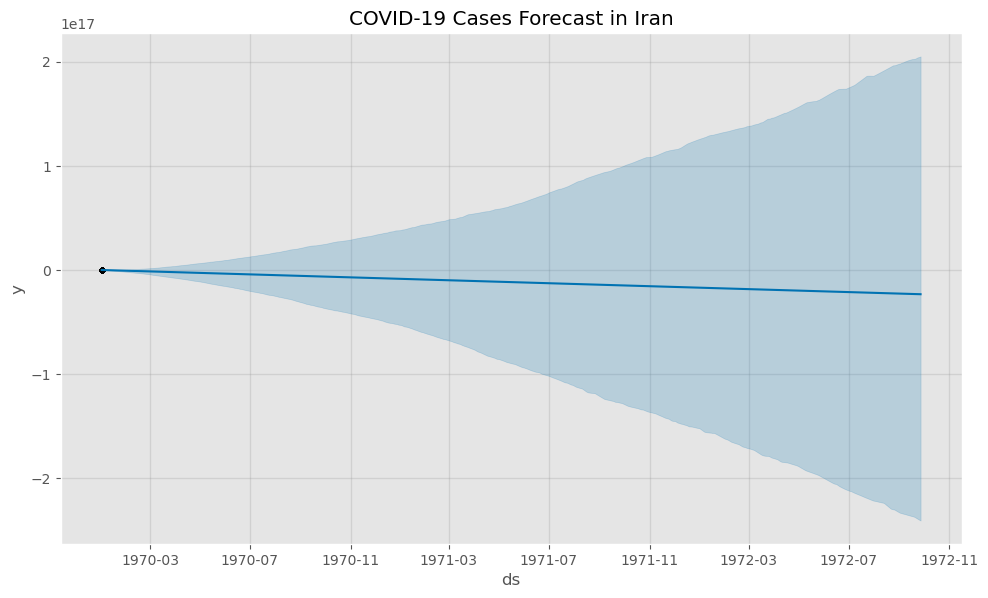

In [11]:
from prophet import Prophet
import matplotlib.pyplot as plt

model = Prophet()
model.fit(iran)

future = model.make_future_dataframe(periods=1000)
forecast = model.predict(future)

model.plot(forecast)
plt.title("COVID-19 Cases Forecast in Iran")
plt.show()
